In [15]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.initializers import glorot_uniform  # Or your initializer of choice
from keras.datasets import mnist
import numpy as np
import random
import keras.backend as K
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()


In [17]:
x_train = x_train.astype('float30') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)


(60000, 784)
(10000, 784)
(784, 32)
(32,)
(32, 784)
(784,)
[None, 784]
[None, 32]
[None, 784]
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
x_train=x_train[0:50]
x_test=x_train[0:10]
print (x_train.shape)
print (x_test.shape)
initial_weights = autoencoder.get_weights()
k_eval = lambda placeholder: placeholder.eval(session=K.get_session())
new_weights = [k_eval(glorot_uniform()(w.shape)) for w in initial_weights]
autoencoder.set_weights(new_weights)

autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)
train()

(50, 784)
(10, 784)
Instructions for updating:
Use tf.cast instead.
Train on 50 samples, validate on 10 samples
Epoch 1/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.7055 - val_loss: 0.7019
Epoch 2/1000
50/50 [==============================] - 0s 375us/step - loss: 0.7006 - val_loss: 0.6986
Epoch 3/1000
50/50 [==============================] - 0s 421us/step - loss: 0.6976 - val_loss: 0.6959
Epoch 4/1000
50/50 [==============================] - 0s 488us/step - loss: 0.6948 - val_loss: 0.6929
Epoch 5/1000
50/50 [==============================] - 0s 407us/step - loss: 0.6915 - val_loss: 0.6888
Epoch 6/1000
50/50 [==============================] - 0s 393us/step - loss: 0.6866 - val_loss: 0.6825
Epoch 7/1000
50/50 [==============================] - 0s 413us/step - loss: 0.6788 - val_loss: 0.6722
Epoch 8/1000
50/50 [==============================] - 0s 516us/step - loss: 0.6661 - val_loss: 0.6556
Epoch 9/1000
50/50 [==============================] - 0s 396us/step - loss

50/50 [==============================] - 0s 417us/step - loss: 0.2690 - val_loss: 0.2656
Epoch 78/1000
50/50 [==============================] - 0s 464us/step - loss: 0.2686 - val_loss: 0.2651
Epoch 79/1000
50/50 [==============================] - 0s 472us/step - loss: 0.2680 - val_loss: 0.2647
Epoch 80/1000
50/50 [==============================] - 0s 401us/step - loss: 0.2676 - val_loss: 0.2642
Epoch 81/1000
50/50 [==============================] - 0s 434us/step - loss: 0.2671 - val_loss: 0.2638
Epoch 82/1000
50/50 [==============================] - 0s 395us/step - loss: 0.2668 - val_loss: 0.2633
Epoch 83/1000
50/50 [==============================] - 0s 395us/step - loss: 0.2664 - val_loss: 0.2629
Epoch 84/1000
50/50 [==============================] - 0s 435us/step - loss: 0.2659 - val_loss: 0.2624
Epoch 85/1000
50/50 [==============================] - 0s 396us/step - loss: 0.2654 - val_loss: 0.2620
Epoch 86/1000
50/50 [==============================] - 0s 411us/step - loss: 0.2651 - v

50/50 [==============================] - 0s 448us/step - loss: 0.2433 - val_loss: 0.2389
Epoch 157/1000
50/50 [==============================] - 0s 447us/step - loss: 0.2430 - val_loss: 0.2387
Epoch 158/1000
50/50 [==============================] - 0s 451us/step - loss: 0.2428 - val_loss: 0.2384
Epoch 159/1000
50/50 [==============================] - 0s 473us/step - loss: 0.2425 - val_loss: 0.2382
Epoch 160/1000
50/50 [==============================] - 0s 407us/step - loss: 0.2424 - val_loss: 0.2380
Epoch 161/1000
50/50 [==============================] - 0s 414us/step - loss: 0.2421 - val_loss: 0.2377
Epoch 162/1000
50/50 [==============================] - 0s 370us/step - loss: 0.2418 - val_loss: 0.2375
Epoch 163/1000
50/50 [==============================] - 0s 499us/step - loss: 0.2416 - val_loss: 0.2373
Epoch 164/1000
50/50 [==============================] - 0s 401us/step - loss: 0.2414 - val_loss: 0.2370
Epoch 165/1000
50/50 [==============================] - 0s 377us/step - loss: 0

50/50 [==============================] - 0s 402us/step - loss: 0.2258 - val_loss: 0.2208
Epoch 235/1000
50/50 [==============================] - 0s 407us/step - loss: 0.2257 - val_loss: 0.2206
Epoch 236/1000
50/50 [==============================] - 0s 357us/step - loss: 0.2254 - val_loss: 0.2204
Epoch 237/1000
50/50 [==============================] - 0s 414us/step - loss: 0.2252 - val_loss: 0.2202
Epoch 238/1000
50/50 [==============================] - 0s 383us/step - loss: 0.2251 - val_loss: 0.2200
Epoch 239/1000
50/50 [==============================] - 0s 412us/step - loss: 0.2249 - val_loss: 0.2198
Epoch 240/1000
50/50 [==============================] - 0s 377us/step - loss: 0.2247 - val_loss: 0.2196
Epoch 241/1000
50/50 [==============================] - 0s 403us/step - loss: 0.2246 - val_loss: 0.2194
Epoch 242/1000
50/50 [==============================] - 0s 371us/step - loss: 0.2244 - val_loss: 0.2191
Epoch 243/1000
50/50 [==============================] - 0s 392us/step - loss: 0

Epoch 313/1000
50/50 [==============================] - 0s 360us/step - loss: 0.2135 - val_loss: 0.2060
Epoch 314/1000
50/50 [==============================] - 0s 452us/step - loss: 0.2133 - val_loss: 0.2059
Epoch 315/1000
50/50 [==============================] - 0s 515us/step - loss: 0.2133 - val_loss: 0.2057
Epoch 316/1000
50/50 [==============================] - 0s 449us/step - loss: 0.2131 - val_loss: 0.2055
Epoch 317/1000
50/50 [==============================] - 0s 411us/step - loss: 0.2129 - val_loss: 0.2053
Epoch 318/1000
50/50 [==============================] - 0s 392us/step - loss: 0.2128 - val_loss: 0.2052
Epoch 319/1000
50/50 [==============================] - 0s 334us/step - loss: 0.2126 - val_loss: 0.2050
Epoch 320/1000
50/50 [==============================] - 0s 352us/step - loss: 0.2125 - val_loss: 0.2049
Epoch 321/1000
50/50 [==============================] - 0s 441us/step - loss: 0.2123 - val_loss: 0.2047
Epoch 322/1000
50/50 [==============================] - 0s 511us

50/50 [==============================] - 0s 374us/step - loss: 0.2022 - val_loss: 0.1929
Epoch 392/1000
50/50 [==============================] - 0s 347us/step - loss: 0.2020 - val_loss: 0.1927
Epoch 393/1000
50/50 [==============================] - 0s 375us/step - loss: 0.2019 - val_loss: 0.1925
Epoch 394/1000
50/50 [==============================] - 0s 444us/step - loss: 0.2017 - val_loss: 0.1923
Epoch 395/1000
50/50 [==============================] - 0s 390us/step - loss: 0.2015 - val_loss: 0.1922
Epoch 396/1000
50/50 [==============================] - 0s 376us/step - loss: 0.2014 - val_loss: 0.1920
Epoch 397/1000
50/50 [==============================] - 0s 414us/step - loss: 0.2013 - val_loss: 0.1918
Epoch 398/1000
50/50 [==============================] - 0s 398us/step - loss: 0.2011 - val_loss: 0.1916
Epoch 399/1000
50/50 [==============================] - 0s 380us/step - loss: 0.2010 - val_loss: 0.1915
Epoch 400/1000
50/50 [==============================] - 0s 427us/step - loss: 0

50/50 [==============================] - 0s 390us/step - loss: 0.1905 - val_loss: 0.1793
Epoch 470/1000
50/50 [==============================] - 0s 375us/step - loss: 0.1904 - val_loss: 0.1791
Epoch 471/1000
50/50 [==============================] - 0s 429us/step - loss: 0.1902 - val_loss: 0.1790
Epoch 472/1000
50/50 [==============================] - 0s 337us/step - loss: 0.1901 - val_loss: 0.1788
Epoch 473/1000
50/50 [==============================] - 0s 346us/step - loss: 0.1899 - val_loss: 0.1787
Epoch 474/1000
50/50 [==============================] - 0s 350us/step - loss: 0.1898 - val_loss: 0.1785
Epoch 475/1000
50/50 [==============================] - 0s 406us/step - loss: 0.1897 - val_loss: 0.1784
Epoch 476/1000
50/50 [==============================] - 0s 382us/step - loss: 0.1895 - val_loss: 0.1782
Epoch 477/1000
50/50 [==============================] - 0s 439us/step - loss: 0.1893 - val_loss: 0.1781
Epoch 478/1000
50/50 [==============================] - 0s 388us/step - loss: 0

50/50 [==============================] - 0s 391us/step - loss: 0.1810 - val_loss: 0.1692
Epoch 548/1000
50/50 [==============================] - 0s 386us/step - loss: 0.1809 - val_loss: 0.1691
Epoch 549/1000
50/50 [==============================] - 0s 391us/step - loss: 0.1807 - val_loss: 0.1690
Epoch 550/1000
50/50 [==============================] - 0s 396us/step - loss: 0.1807 - val_loss: 0.1689
Epoch 551/1000
50/50 [==============================] - 0s 396us/step - loss: 0.1806 - val_loss: 0.1688
Epoch 552/1000
50/50 [==============================] - 0s 390us/step - loss: 0.1805 - val_loss: 0.1687
Epoch 553/1000
50/50 [==============================] - 0s 361us/step - loss: 0.1804 - val_loss: 0.1686
Epoch 554/1000
50/50 [==============================] - 0s 477us/step - loss: 0.1802 - val_loss: 0.1685
Epoch 555/1000
50/50 [==============================] - 0s 410us/step - loss: 0.1802 - val_loss: 0.1684
Epoch 556/1000
50/50 [==============================] - 0s 372us/step - loss: 0

50/50 [==============================] - 0s 678us/step - loss: 0.1745 - val_loss: 0.1630
Epoch 626/1000
50/50 [==============================] - 0s 454us/step - loss: 0.1744 - val_loss: 0.1629
Epoch 627/1000
50/50 [==============================] - 0s 391us/step - loss: 0.1744 - val_loss: 0.1629
Epoch 628/1000
50/50 [==============================] - 0s 419us/step - loss: 0.1743 - val_loss: 0.1628
Epoch 629/1000
50/50 [==============================] - 0s 385us/step - loss: 0.1742 - val_loss: 0.1628
Epoch 630/1000
50/50 [==============================] - 0s 445us/step - loss: 0.1742 - val_loss: 0.1627
Epoch 631/1000
50/50 [==============================] - 0s 534us/step - loss: 0.1741 - val_loss: 0.1626
Epoch 632/1000
50/50 [==============================] - 0s 432us/step - loss: 0.1741 - val_loss: 0.1626
Epoch 633/1000
50/50 [==============================] - 0s 367us/step - loss: 0.1740 - val_loss: 0.1625
Epoch 634/1000
50/50 [==============================] - 0s 379us/step - loss: 0

Epoch 704/1000
50/50 [==============================] - 0s 378us/step - loss: 0.1701 - val_loss: 0.1589
Epoch 705/1000
50/50 [==============================] - 0s 369us/step - loss: 0.1701 - val_loss: 0.1589
Epoch 706/1000
50/50 [==============================] - 0s 432us/step - loss: 0.1700 - val_loss: 0.1588
Epoch 707/1000
50/50 [==============================] - 0s 395us/step - loss: 0.1700 - val_loss: 0.1588
Epoch 708/1000
50/50 [==============================] - 0s 415us/step - loss: 0.1699 - val_loss: 0.1587
Epoch 709/1000
50/50 [==============================] - 0s 370us/step - loss: 0.1699 - val_loss: 0.1587
Epoch 710/1000
50/50 [==============================] - 0s 343us/step - loss: 0.1698 - val_loss: 0.1587
Epoch 711/1000
50/50 [==============================] - 0s 390us/step - loss: 0.1698 - val_loss: 0.1586
Epoch 712/1000
50/50 [==============================] - 0s 350us/step - loss: 0.1697 - val_loss: 0.1586
Epoch 713/1000
50/50 [==============================] - 0s 347us

Epoch 783/1000
50/50 [==============================] - 0s 395us/step - loss: 0.1668 - val_loss: 0.1556
Epoch 784/1000
50/50 [==============================] - 0s 372us/step - loss: 0.1668 - val_loss: 0.1555
Epoch 785/1000
50/50 [==============================] - 0s 403us/step - loss: 0.1668 - val_loss: 0.1555
Epoch 786/1000
50/50 [==============================] - 0s 357us/step - loss: 0.1667 - val_loss: 0.1555
Epoch 787/1000
50/50 [==============================] - 0s 402us/step - loss: 0.1667 - val_loss: 0.1554
Epoch 788/1000
50/50 [==============================] - 0s 543us/step - loss: 0.1667 - val_loss: 0.1554
Epoch 789/1000
50/50 [==============================] - 0s 397us/step - loss: 0.1666 - val_loss: 0.1554
Epoch 790/1000
50/50 [==============================] - 0s 424us/step - loss: 0.1666 - val_loss: 0.1553
Epoch 791/1000
50/50 [==============================] - 0s 431us/step - loss: 0.1665 - val_loss: 0.1553
Epoch 792/1000
50/50 [==============================] - 0s 495us

50/50 [==============================] - 0s 480us/step - loss: 0.1643 - val_loss: 0.1530
Epoch 862/1000
50/50 [==============================] - 0s 434us/step - loss: 0.1643 - val_loss: 0.1530
Epoch 863/1000
50/50 [==============================] - 0s 540us/step - loss: 0.1642 - val_loss: 0.1529
Epoch 864/1000
50/50 [==============================] - 0s 389us/step - loss: 0.1642 - val_loss: 0.1529
Epoch 865/1000
50/50 [==============================] - 0s 390us/step - loss: 0.1642 - val_loss: 0.1529
Epoch 866/1000
50/50 [==============================] - 0s 457us/step - loss: 0.1641 - val_loss: 0.1529
Epoch 867/1000
50/50 [==============================] - 0s 416us/step - loss: 0.1641 - val_loss: 0.1528
Epoch 868/1000
50/50 [==============================] - 0s 423us/step - loss: 0.1641 - val_loss: 0.1528
Epoch 869/1000
50/50 [==============================] - 0s 401us/step - loss: 0.1641 - val_loss: 0.1528
Epoch 870/1000
50/50 [==============================] - 0s 440us/step - loss: 0

50/50 [==============================] - 0s 405us/step - loss: 0.1622 - val_loss: 0.1509
Epoch 940/1000
50/50 [==============================] - 0s 348us/step - loss: 0.1621 - val_loss: 0.1508
Epoch 941/1000
50/50 [==============================] - 0s 331us/step - loss: 0.1621 - val_loss: 0.1508
Epoch 942/1000
50/50 [==============================] - 0s 377us/step - loss: 0.1621 - val_loss: 0.1508
Epoch 943/1000
50/50 [==============================] - 0s 412us/step - loss: 0.1621 - val_loss: 0.1508
Epoch 944/1000
50/50 [==============================] - 0s 459us/step - loss: 0.1620 - val_loss: 0.1508
Epoch 945/1000
50/50 [==============================] - 0s 481us/step - loss: 0.1620 - val_loss: 0.1507
Epoch 946/1000
50/50 [==============================] - 0s 360us/step - loss: 0.1620 - val_loss: 0.1507
Epoch 947/1000
50/50 [==============================] - 0s 391us/step - loss: 0.1620 - val_loss: 0.1507
Epoch 948/1000
50/50 [==============================] - 0s 446us/step - loss: 0

50/50 [==============================] - 0s 386us/step - loss: 0.3388 - val_loss: 0.3313
Epoch 18/1000
50/50 [==============================] - 0s 394us/step - loss: 0.3336 - val_loss: 0.3268
Epoch 19/1000
50/50 [==============================] - 0s 390us/step - loss: 0.3299 - val_loss: 0.3231
Epoch 20/1000
50/50 [==============================] - 0s 463us/step - loss: 0.3267 - val_loss: 0.3201
Epoch 21/1000
50/50 [==============================] - 0s 470us/step - loss: 0.3241 - val_loss: 0.3176
Epoch 22/1000
50/50 [==============================] - 0s 375us/step - loss: 0.3218 - val_loss: 0.3155
Epoch 23/1000
50/50 [==============================] - ETA: 0s - loss: 0.325 - 0s 431us/step - loss: 0.3197 - val_loss: 0.3137
Epoch 24/1000
50/50 [==============================] - 0s 364us/step - loss: 0.3181 - val_loss: 0.3120
Epoch 25/1000
50/50 [==============================] - 0s 416us/step - loss: 0.3166 - val_loss: 0.3106
Epoch 26/1000
50/50 [==============================] - 0s 417us

50/50 [==============================] - 0s 496us/step - loss: 0.2616 - val_loss: 0.2587
Epoch 97/1000
50/50 [==============================] - 0s 476us/step - loss: 0.2609 - val_loss: 0.2581
Epoch 98/1000
50/50 [==============================] - 0s 413us/step - loss: 0.2604 - val_loss: 0.2575
Epoch 99/1000
50/50 [==============================] - 0s 427us/step - loss: 0.2598 - val_loss: 0.2569
Epoch 100/1000
50/50 [==============================] - 0s 472us/step - loss: 0.2592 - val_loss: 0.2562
Epoch 101/1000
50/50 [==============================] - 0s 474us/step - loss: 0.2585 - val_loss: 0.2556
Epoch 102/1000
50/50 [==============================] - 0s 597us/step - loss: 0.2580 - val_loss: 0.2550
Epoch 103/1000
50/50 [==============================] - 0s 495us/step - loss: 0.2575 - val_loss: 0.2544
Epoch 104/1000
50/50 [==============================] - 0s 430us/step - loss: 0.2568 - val_loss: 0.2538
Epoch 105/1000
50/50 [==============================] - 0s 401us/step - loss: 0.25

50/50 [==============================] - 0s 359us/step - loss: 0.2282 - val_loss: 0.2251
Epoch 175/1000
50/50 [==============================] - 0s 389us/step - loss: 0.2279 - val_loss: 0.2247
Epoch 176/1000
50/50 [==============================] - 0s 393us/step - loss: 0.2276 - val_loss: 0.2245
Epoch 177/1000
50/50 [==============================] - 0s 372us/step - loss: 0.2272 - val_loss: 0.2241
Epoch 178/1000
50/50 [==============================] - 0s 338us/step - loss: 0.2270 - val_loss: 0.2238
Epoch 179/1000
50/50 [==============================] - 0s 383us/step - loss: 0.2266 - val_loss: 0.2235
Epoch 180/1000
50/50 [==============================] - 0s 396us/step - loss: 0.2263 - val_loss: 0.2232
Epoch 181/1000
50/50 [==============================] - 0s 400us/step - loss: 0.2261 - val_loss: 0.2230
Epoch 182/1000
50/50 [==============================] - 0s 378us/step - loss: 0.2258 - val_loss: 0.2227
Epoch 183/1000
50/50 [==============================] - 0s 401us/step - loss: 0

Epoch 253/1000
50/50 [==============================] - 0s 522us/step - loss: 0.2079 - val_loss: 0.2054
Epoch 254/1000
50/50 [==============================] - 0s 356us/step - loss: 0.2076 - val_loss: 0.2052
Epoch 255/1000
50/50 [==============================] - 0s 429us/step - loss: 0.2074 - val_loss: 0.2050
Epoch 256/1000
50/50 [==============================] - 0s 428us/step - loss: 0.2072 - val_loss: 0.2048
Epoch 257/1000
50/50 [==============================] - 0s 396us/step - loss: 0.2070 - val_loss: 0.2046
Epoch 258/1000
50/50 [==============================] - 0s 404us/step - loss: 0.2068 - val_loss: 0.2044
Epoch 259/1000
50/50 [==============================] - 0s 399us/step - loss: 0.2066 - val_loss: 0.2042
Epoch 260/1000
50/50 [==============================] - 0s 451us/step - loss: 0.2064 - val_loss: 0.2040
Epoch 261/1000
50/50 [==============================] - 0s 499us/step - loss: 0.2062 - val_loss: 0.2038
Epoch 262/1000
50/50 [==============================] - 0s 406us

50/50 [==============================] - 0s 411us/step - loss: 0.1947 - val_loss: 0.1920
Epoch 332/1000
50/50 [==============================] - 0s 400us/step - loss: 0.1946 - val_loss: 0.1919
Epoch 333/1000
50/50 [==============================] - 0s 373us/step - loss: 0.1944 - val_loss: 0.1917
Epoch 334/1000
50/50 [==============================] - 0s 372us/step - loss: 0.1943 - val_loss: 0.1916
Epoch 335/1000
50/50 [==============================] - 0s 411us/step - loss: 0.1942 - val_loss: 0.1915
Epoch 336/1000
50/50 [==============================] - 0s 426us/step - loss: 0.1940 - val_loss: 0.1913
Epoch 337/1000
50/50 [==============================] - 0s 382us/step - loss: 0.1939 - val_loss: 0.1912
Epoch 338/1000
50/50 [==============================] - 0s 366us/step - loss: 0.1938 - val_loss: 0.1910
Epoch 339/1000
50/50 [==============================] - 0s 365us/step - loss: 0.1937 - val_loss: 0.1909
Epoch 340/1000
50/50 [==============================] - 0s 416us/step - loss: 0

Epoch 410/1000
50/50 [==============================] - 0s 391us/step - loss: 0.1855 - val_loss: 0.1826
Epoch 411/1000
50/50 [==============================] - 0s 398us/step - loss: 0.1854 - val_loss: 0.1825
Epoch 412/1000
50/50 [==============================] - 0s 358us/step - loss: 0.1853 - val_loss: 0.1824
Epoch 413/1000
50/50 [==============================] - 0s 394us/step - loss: 0.1852 - val_loss: 0.1823
Epoch 414/1000
50/50 [==============================] - 0s 443us/step - loss: 0.1851 - val_loss: 0.1822
Epoch 415/1000
50/50 [==============================] - 0s 349us/step - loss: 0.1850 - val_loss: 0.1821
Epoch 416/1000
50/50 [==============================] - 0s 396us/step - loss: 0.1849 - val_loss: 0.1820
Epoch 417/1000
50/50 [==============================] - 0s 448us/step - loss: 0.1848 - val_loss: 0.1819
Epoch 418/1000
50/50 [==============================] - 0s 452us/step - loss: 0.1847 - val_loss: 0.1819
Epoch 419/1000
50/50 [==============================] - 0s 375us

Epoch 489/1000
50/50 [==============================] - 0s 363us/step - loss: 0.1780 - val_loss: 0.1758
Epoch 490/1000
50/50 [==============================] - ETA: 0s - loss: 0.186 - 0s 494us/step - loss: 0.1779 - val_loss: 0.1758
Epoch 491/1000
50/50 [==============================] - 0s 427us/step - loss: 0.1779 - val_loss: 0.1757
Epoch 492/1000
50/50 [==============================] - 0s 466us/step - loss: 0.1777 - val_loss: 0.1756
Epoch 493/1000
50/50 [==============================] - 0s 379us/step - loss: 0.1777 - val_loss: 0.1755
Epoch 494/1000
50/50 [==============================] - 0s 535us/step - loss: 0.1776 - val_loss: 0.1755
Epoch 495/1000
50/50 [==============================] - 0s 370us/step - loss: 0.1775 - val_loss: 0.1754
Epoch 496/1000
50/50 [==============================] - 0s 359us/step - loss: 0.1774 - val_loss: 0.1753
Epoch 497/1000
50/50 [==============================] - 0s 416us/step - loss: 0.1773 - val_loss: 0.1752
Epoch 498/1000
50/50 [==================

50/50 [==============================] - 0s 380us/step - loss: 0.1716 - val_loss: 0.1708
Epoch 568/1000
50/50 [==============================] - 0s 408us/step - loss: 0.1715 - val_loss: 0.1707
Epoch 569/1000
50/50 [==============================] - 0s 348us/step - loss: 0.1715 - val_loss: 0.1707
Epoch 570/1000
50/50 [==============================] - 0s 394us/step - loss: 0.1714 - val_loss: 0.1706
Epoch 571/1000
50/50 [==============================] - 0s 380us/step - loss: 0.1713 - val_loss: 0.1706
Epoch 572/1000
50/50 [==============================] - 0s 439us/step - loss: 0.1712 - val_loss: 0.1705
Epoch 573/1000
50/50 [==============================] - 0s 432us/step - loss: 0.1712 - val_loss: 0.1704
Epoch 574/1000
50/50 [==============================] - 0s 422us/step - loss: 0.1711 - val_loss: 0.1704
Epoch 575/1000
50/50 [==============================] - 0s 427us/step - loss: 0.1710 - val_loss: 0.1703
Epoch 576/1000
50/50 [==============================] - 0s 408us/step - loss: 0

50/50 [==============================] - 0s 408us/step - loss: 0.1661 - val_loss: 0.1667
Epoch 646/1000
50/50 [==============================] - 0s 430us/step - loss: 0.1660 - val_loss: 0.1667
Epoch 647/1000
50/50 [==============================] - 0s 387us/step - loss: 0.1659 - val_loss: 0.1666
Epoch 648/1000
50/50 [==============================] - 0s 398us/step - loss: 0.1659 - val_loss: 0.1666
Epoch 649/1000
50/50 [==============================] - 0s 362us/step - loss: 0.1658 - val_loss: 0.1665
Epoch 650/1000
50/50 [==============================] - 0s 387us/step - loss: 0.1657 - val_loss: 0.1665
Epoch 651/1000
50/50 [==============================] - 0s 377us/step - loss: 0.1657 - val_loss: 0.1665
Epoch 652/1000
50/50 [==============================] - 0s 452us/step - loss: 0.1656 - val_loss: 0.1664
Epoch 653/1000
50/50 [==============================] - 0s 414us/step - loss: 0.1655 - val_loss: 0.1663
Epoch 654/1000
50/50 [==============================] - 0s 442us/step - loss: 0

Epoch 724/1000
50/50 [==============================] - 0s 398us/step - loss: 0.1612 - val_loss: 0.1632
Epoch 725/1000
50/50 [==============================] - 0s 381us/step - loss: 0.1611 - val_loss: 0.1632
Epoch 726/1000
50/50 [==============================] - 0s 339us/step - loss: 0.1611 - val_loss: 0.1631
Epoch 727/1000
50/50 [==============================] - 0s 380us/step - loss: 0.1610 - val_loss: 0.1631
Epoch 728/1000
50/50 [==============================] - 0s 454us/step - loss: 0.1610 - val_loss: 0.1630
Epoch 729/1000
50/50 [==============================] - 0s 509us/step - loss: 0.1609 - val_loss: 0.1630
Epoch 730/1000
50/50 [==============================] - ETA: 0s - loss: 0.158 - 0s 382us/step - loss: 0.1609 - val_loss: 0.1630
Epoch 731/1000
50/50 [==============================] - 0s 479us/step - loss: 0.1608 - val_loss: 0.1629
Epoch 732/1000
50/50 [==============================] - 0s 439us/step - loss: 0.1608 - val_loss: 0.1629
Epoch 733/1000
50/50 [==================

50/50 [==============================] - 0s 461us/step - loss: 0.1571 - val_loss: 0.1600
Epoch 803/1000
50/50 [==============================] - 0s 389us/step - loss: 0.1571 - val_loss: 0.1600
Epoch 804/1000
50/50 [==============================] - 0s 373us/step - loss: 0.1570 - val_loss: 0.1599
Epoch 805/1000
50/50 [==============================] - 0s 341us/step - loss: 0.1570 - val_loss: 0.1599
Epoch 806/1000
50/50 [==============================] - 0s 359us/step - loss: 0.1569 - val_loss: 0.1598
Epoch 807/1000
50/50 [==============================] - 0s 411us/step - loss: 0.1569 - val_loss: 0.1598
Epoch 808/1000
50/50 [==============================] - 0s 350us/step - loss: 0.1569 - val_loss: 0.1598
Epoch 809/1000
50/50 [==============================] - 0s 374us/step - loss: 0.1568 - val_loss: 0.1597
Epoch 810/1000
50/50 [==============================] - 0s 400us/step - loss: 0.1567 - val_loss: 0.1597
Epoch 811/1000
50/50 [==============================] - 0s 427us/step - loss: 0

50/50 [==============================] - 0s 397us/step - loss: 0.1536 - val_loss: 0.1569
Epoch 881/1000
50/50 [==============================] - 0s 427us/step - loss: 0.1535 - val_loss: 0.1568
Epoch 882/1000
50/50 [==============================] - 0s 402us/step - loss: 0.1535 - val_loss: 0.1568
Epoch 883/1000
50/50 [==============================] - 0s 384us/step - loss: 0.1535 - val_loss: 0.1568
Epoch 884/1000
50/50 [==============================] - 0s 425us/step - loss: 0.1534 - val_loss: 0.1567
Epoch 885/1000
50/50 [==============================] - 0s 480us/step - loss: 0.1534 - val_loss: 0.1567
Epoch 886/1000
50/50 [==============================] - 0s 412us/step - loss: 0.1533 - val_loss: 0.1566
Epoch 887/1000
50/50 [==============================] - 0s 456us/step - loss: 0.1533 - val_loss: 0.1566
Epoch 888/1000
50/50 [==============================] - 0s 404us/step - loss: 0.1532 - val_loss: 0.1566
Epoch 889/1000
50/50 [==============================] - 0s 400us/step - loss: 0

Epoch 959/1000
50/50 [==============================] - 0s 379us/step - loss: 0.1504 - val_loss: 0.1538
Epoch 960/1000
50/50 [==============================] - 0s 463us/step - loss: 0.1503 - val_loss: 0.1538
Epoch 961/1000
50/50 [==============================] - 0s 379us/step - loss: 0.1503 - val_loss: 0.1537
Epoch 962/1000
50/50 [==============================] - 0s 378us/step - loss: 0.1502 - val_loss: 0.1537
Epoch 963/1000
50/50 [==============================] - 0s 454us/step - loss: 0.1502 - val_loss: 0.1537
Epoch 964/1000
50/50 [==============================] - 0s 401us/step - loss: 0.1502 - val_loss: 0.1536
Epoch 965/1000
50/50 [==============================] - 0s 415us/step - loss: 0.1501 - val_loss: 0.1536
Epoch 966/1000
50/50 [==============================] - 0s 379us/step - loss: 0.1501 - val_loss: 0.1535
Epoch 967/1000
50/50 [==============================] - 0s 453us/step - loss: 0.1500 - val_loss: 0.1535
Epoch 968/1000
50/50 [==============================] - 0s 405us

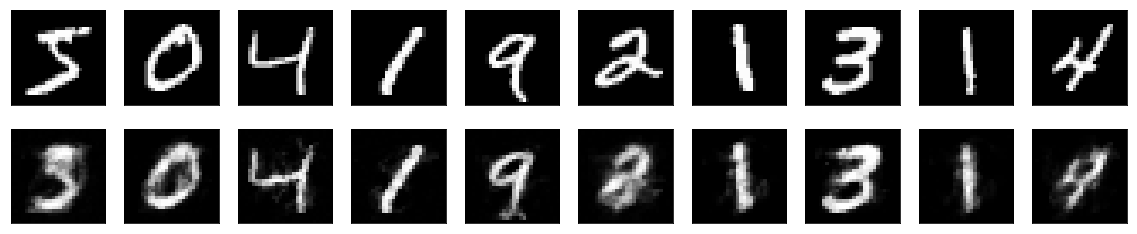

In [20]:

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

from keras.datasets import mnist
import numpy as np
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()